In [11]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy.signal import argrelmin
%matplotlib inline
import csv
import os

In [2]:
directory = '/users/tkm/kanilmaz/thesis/results/wg3_2_double/supercurrent/vsg=-0.41-20171104-15:31:15/'
#directory = '/home/nefta/thesis/results/hb/supercurrent/vsg=0.0-20171114-11:38:40/'
#W = 918 
#L = 204
W = 360
L = 100

In [3]:
dirpath, dirnames, filenames = list(os.walk(directory))[0]
phi_sg_values = [float(filename[4:-18]) for filename in list(os.walk(directory))[0][1]]


In [4]:
dirpath

'/users/tkm/kanilmaz/thesis/results/wg3_2_double/supercurrent/vsg=-0.41-20171104-15:31:15/'

In [5]:
def read_values(filename):
    result = []
    with open(filename) as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            result.append([float(element) for element in row])
    return(result)

In [55]:
def flip_minima(abs_values, real_values):
    main_peak = np.argmax(abs_values) # index of main peak
    left_min = [0]
    right_min = [main_peak]
    print(argrelmin(abs_values, order=20)[0])
    
    #for loc_min in argrelmin(abs_values, order=20)[0]:
    for loc_min in[ 29, 139, 176, 823,  860, 970]:#[ 29 139 176 359 640 823 860 970]:
        if loc_min < main_peak:
            left_min.append(loc_min)
        else: right_min.append(loc_min)
    left_min.append(main_peak)
    right_min.append(len(abs_values))
    left_min_rev = list(reversed(left_min))
    
    #print(left_min, right_min, left_min_rev)
    osc = []
    n = len(left_min)
    for i in range(n - 1):
        #print(n-i - 1, n-i-2)
        for index in range(left_min_rev[n  - i - 1], left_min_rev[n - i - 2]):
            #osc.append((-1)**(i+1) * abs(real_values[index]))
            osc.append((-1)**(n - i) * abs(real_values[index]))
    for i in range(n - 1):
        #print(i, i+1)
        for index in range(right_min[i], right_min[i+1]):
            osc.append((-1)**i * abs(real_values[index]))
    return(osc)

In [38]:
def transform_to_density(b_values, real, imag, y_values):
    omega = 2 * np.pi / W
    
    phi_values = b_values * W * L 
    dPhi = phi_values[1] - phi_values[0]
    maxPhi = phi_values[-1]
    Jy_values = []
    for y in y_values:
        Jy_real = 0
        Jy_imag = 0
        for k, phi in list(enumerate(phi_values)):
            Ic_real = real[k] #Fourier coefficient
            Ic_imag = imag[k]
            Jy_real += abs(np.cos(np.pi * phi / (2 * maxPhi)))**0.5 * (Ic_real * np.cos(omega * phi * y) - Ic_imag * np.sin(omega * phi * y)) * dPhi
            Jy_imag += abs(np.cos(np.pi * phi / (2 * maxPhi)))**0.5 * (Ic_imag * np.cos(omega * phi * y) + Ic_real * np.sin(omega * phi * y)) * dPhi
        Jy_abs = np.sqrt(Jy_real**2 + Jy_imag**2)
        Jy_values.append(Jy_abs)
    return(Jy_values)

In [8]:
def plot_current_and_density(phi_values, abs_values, real_flip, 
                             y_values, j_values, phi_sg, filedir):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
    #fig.suptitle(r'$\varphi_{{SG}} = {}$'.format(phi_sg), fontsize=20)
    ax1.plot(phi_values, abs_values, marker='o', linestyle='none', label='abs')
    ax1.plot(phi_values, real_flip, marker='o', linestyle='none', label='real, flipped')
    ax1.set_xlabel(r'$\phi / \phi_0 $', fontsize=32)
    ax1.set_ylabel(r'$I_c$', fontsize=32)
    ax1.set_xlim(phi_values[0], phi_values[-1])
    #ax1.set_ylim()
    ax1.legend()
    #ax1.grid()
    
    ax2.plot(y_values, j_values, marker='o', linestyle='none')
    ax2.set_xlabel(r'$y\ [a]$', fontsize=32)
    ax2.set_ylabel(r'$J(y)$', fontsize=32)
    ax2.set_xlim(y_values[0], y_values[-1])
    #ax2.grid()
    
    fig.savefig(filedir + '/current_and_density_{}.png'.format(phi_sg))
    #fig.savefig(filedir + '/current_and_density_{}.ps'.format(phi_sg))
    return()

In [9]:
dirpath + 'data.csv'

'/users/tkm/kanilmaz/thesis/results/wg3_2_double/supercurrent/vsg=-0.41-20171104-15:31:15/data.csv'

In [58]:
#for phi_sg, dirname in sorted(zip(phi_sg_values, dirnames)):
#phi_sg, dirname =  sorted(zip(phi_sg_values, dirnames))[9]
phi_sg = 0.0
filename = dirpath + '/data.csv'
filedirectory = dirpath
paramsfile = dirpath + '/params.txt'
params = {}

with open(paramsfile) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        params[row[0]] = row[1]
try:
    values = read_values(filename)
except:
    print('Could not open {}'.format(filename))

abspart, realpart, imagpart = np.asarray(values).T
realpart_flipped = flip_minima(abspart, realpart)





[ 29 139 176 359 640 823 860 970]


()

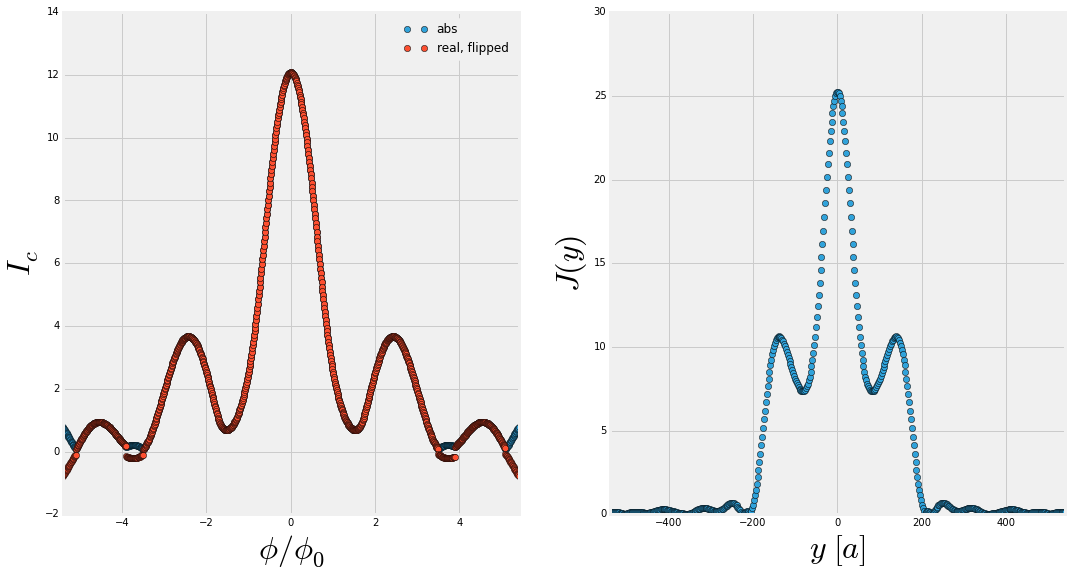

In [59]:
nbPoints = float(params['nb_points'])
maxB = float(params['maxB']) 
mag_field = np.linspace(-maxB, maxB, nbPoints)

phi_norm = mag_field * W * L
y = np.linspace(-1.5*W, 1.5*W, 500)
density = transform_to_density(mag_field, realpart_flipped, imagpart, y)
plot_current_and_density(phi_norm, abspart, realpart_flipped, 
                         y, density, phi_sg, filedirectory)

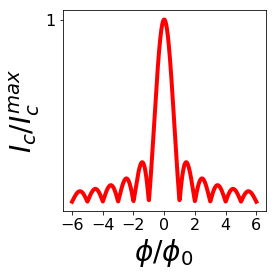

In [55]:
phi = np.linspace(-10, 10, 1000)
ic = np.abs(np.sinc(phi))
fig2, ax2 = plt.subplots(figsize=(10/2.54, 10/2.54))
ax2.plot(phi[200:-200], ic[200:-200], color='r', linewidth=4)
ax2.set_xlabel(r'$\phi / \phi_0 $', fontsize=28)
ax2.set_ylabel(r'$I_c/I_c^{max}$', fontsize=28)
ax2.set_xticks([-6, -4, -2, 0, 2, 4, 6,])
ax2.set_yticks([1])
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(16) 

fig2.tight_layout()
fig2.savefig('ic.png')

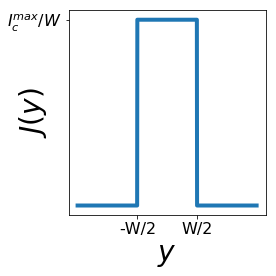

In [58]:
fig2, ax2 = plt.subplots(figsize=(10/2.54, 10/2.54))
y = np.linspace(-10, 10, 900)
jy = np.ravel(np.stack((np.zeros(300), np.ones(300), np.zeros(300))))
ax2.set_xlabel(r'$y$', fontsize=28)
ax2.set_ylabel(r'$J(y)$', fontsize=28,)
ax2.set_xticks([300, 600])
ax2.set_xticklabels(labels=['-W/2', 'W/2'], fontsize=16)
ax2.set_yticks([1])
ax2.set_yticklabels([r'$I_c^{max} / W$'], fontsize=16)
#ax2.grid()
ax2.plot(jy, linewidth=4)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
ax2.yaxis.set_label_coords(-0.1,0.5)
fig2.tight_layout()
fig2.savefig('jy.png')


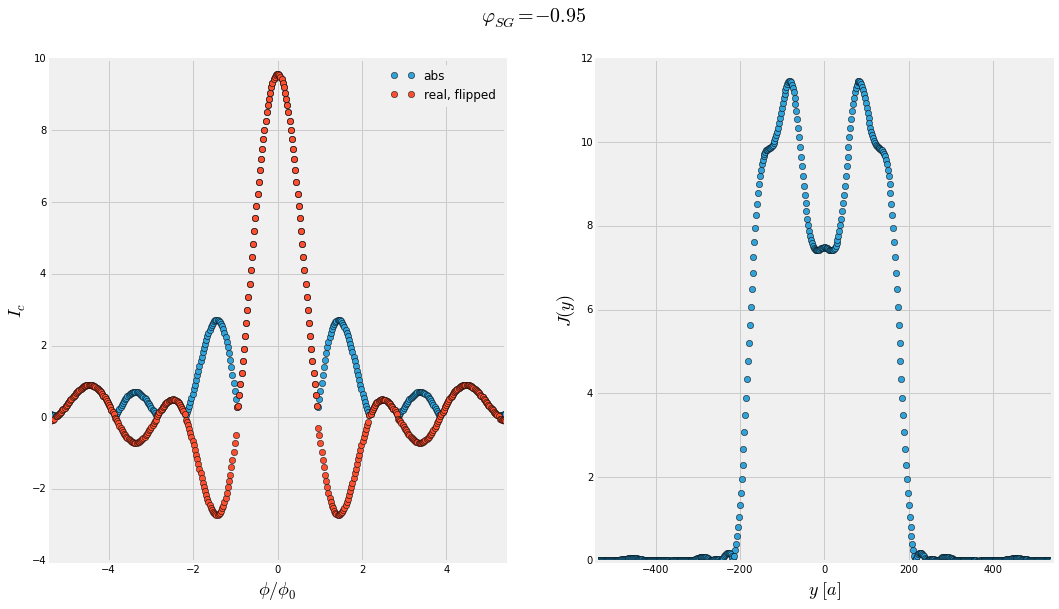

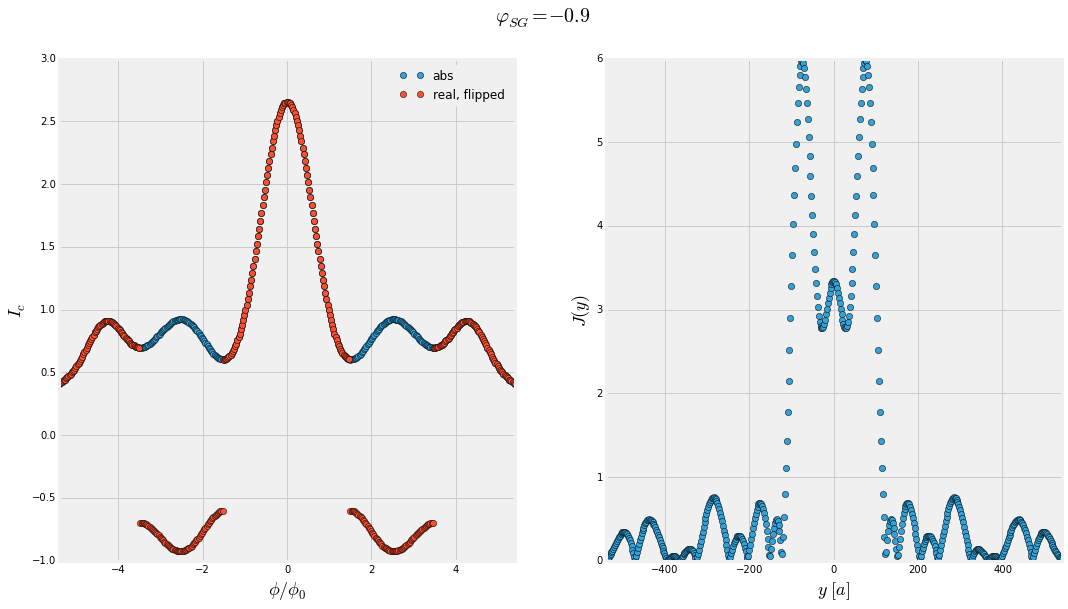

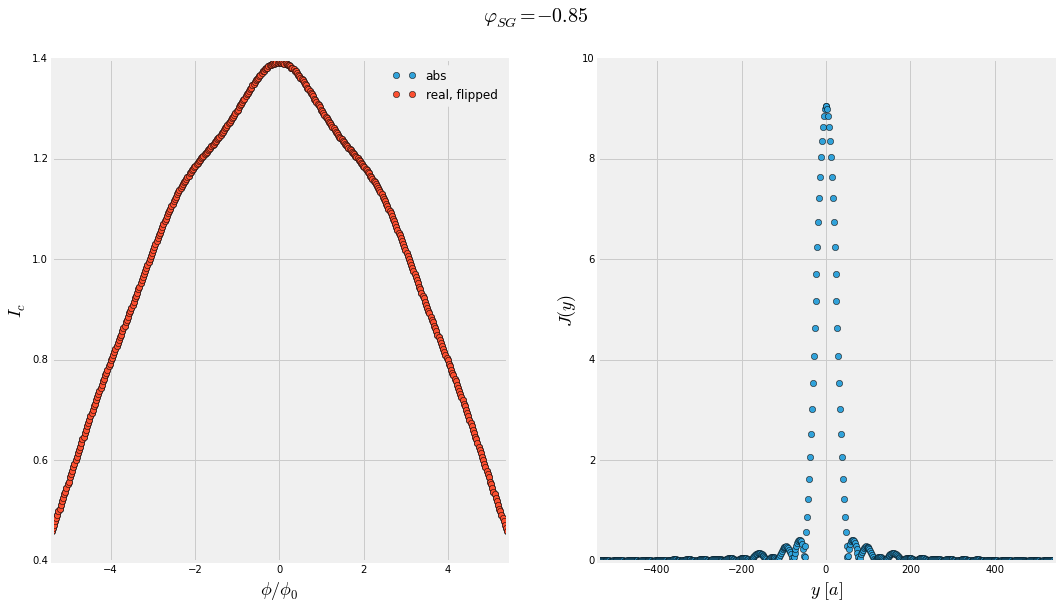

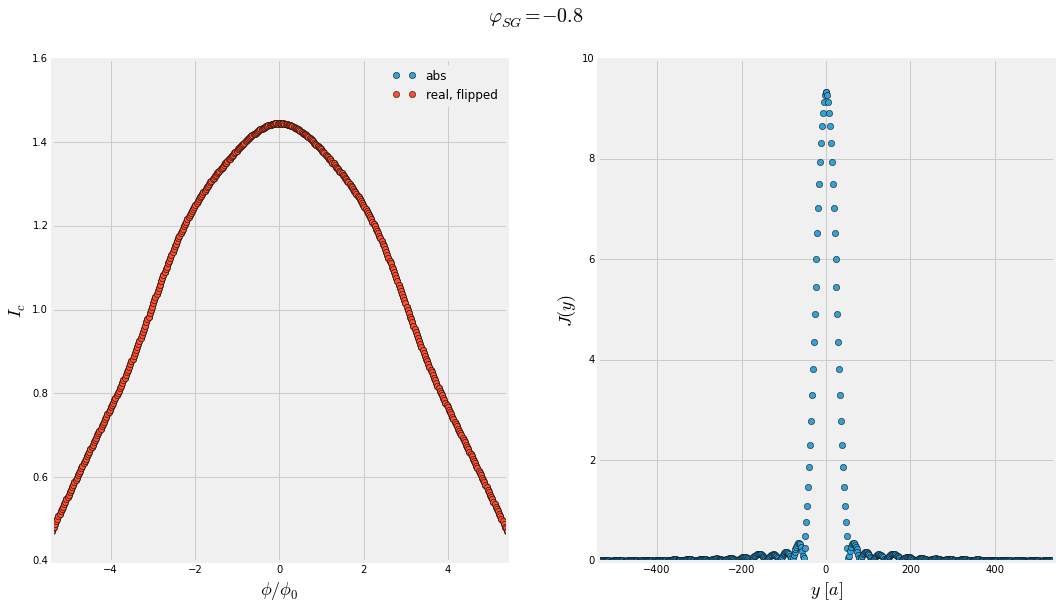

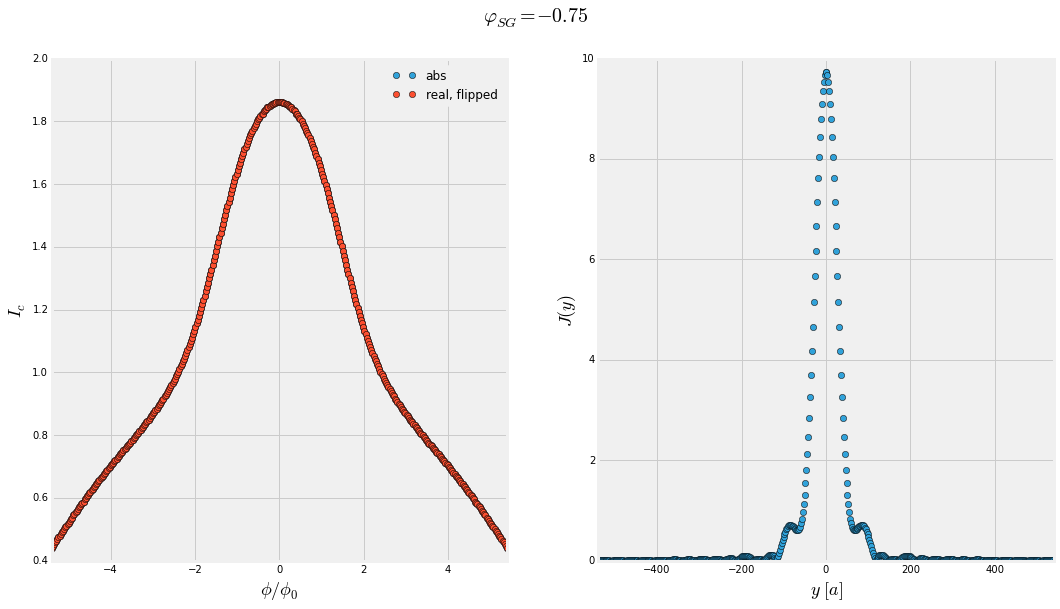

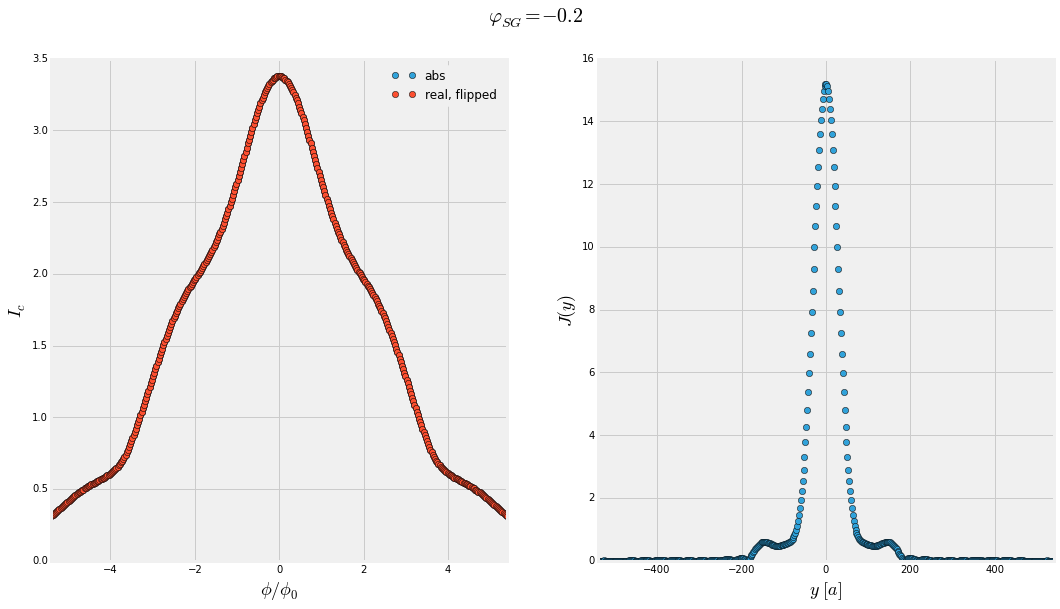

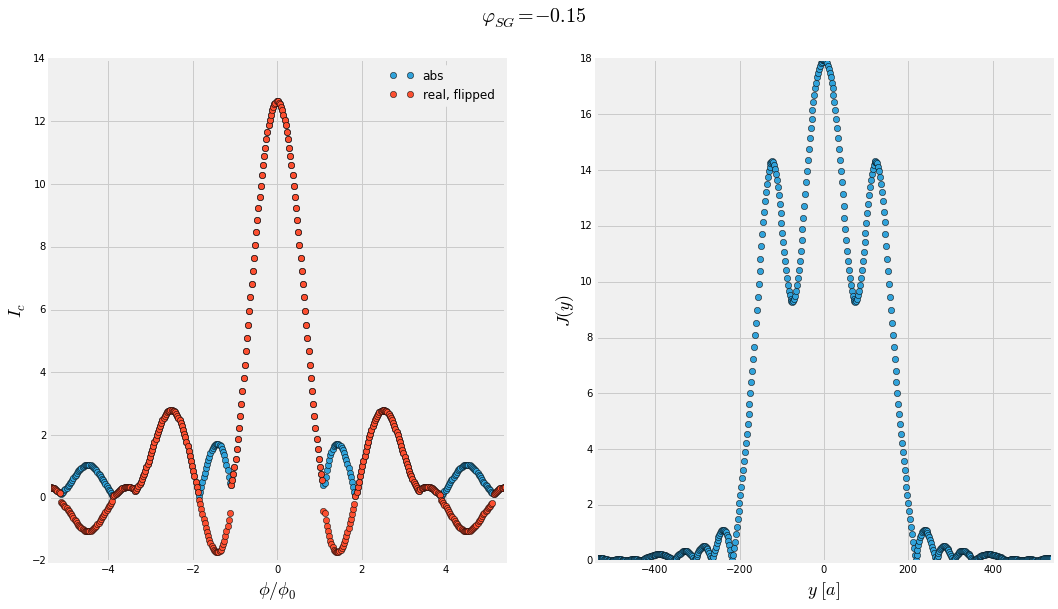

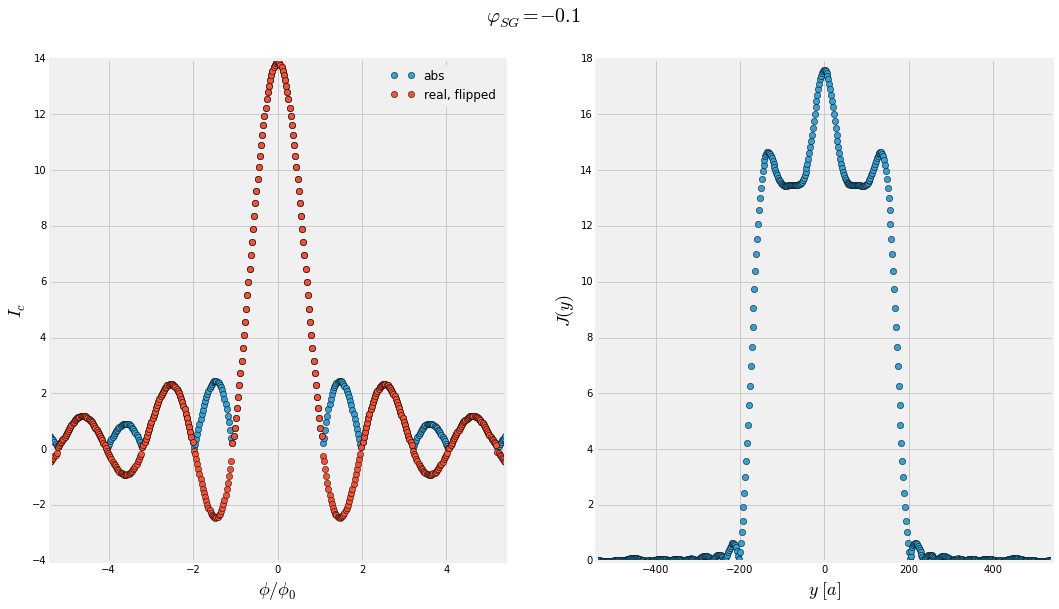

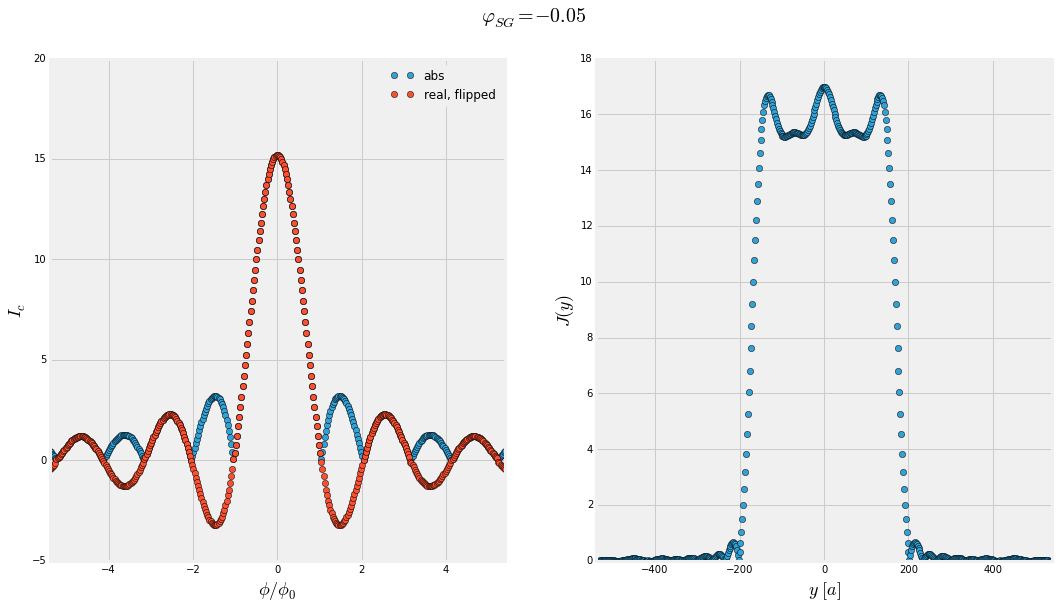

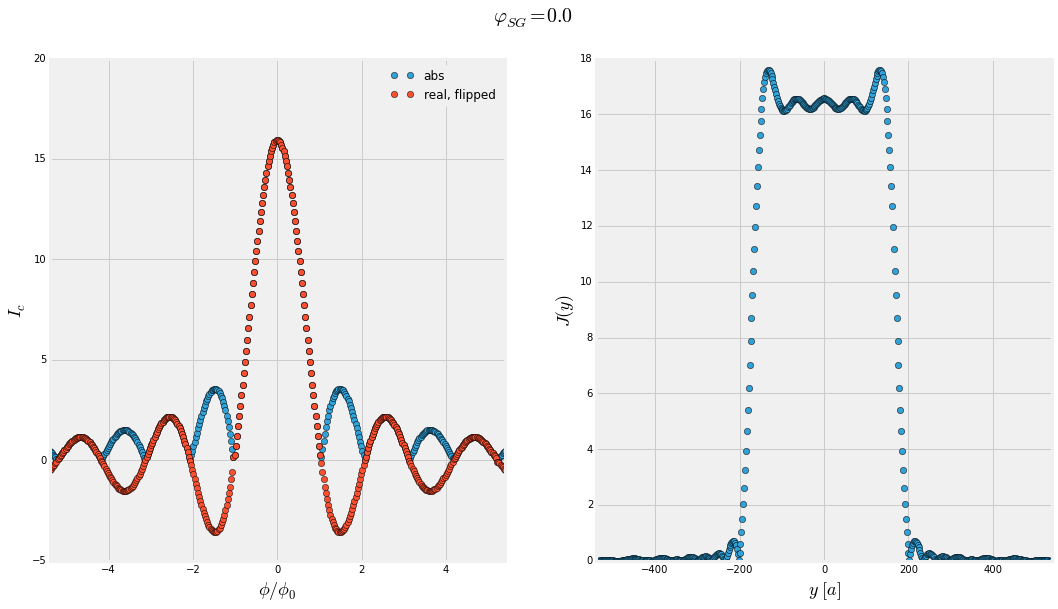

In [13]:
#for phi_sg, dirname in sorted(zip(phi_sg_values, dirnames)):
#phi_sg, dirname =  sorted(zip(phi_sg_values, dirnames))[9]
phi_sg = 0.0
filename = directory + dirname + '/data.csv'
filedirectory = directory + dirname
paramsfile = directory + dirname + '/params.txt'
params = {}

with open(paramsfile) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        params[row[0]] = row[1]
try:
    values = read_values(filename)
except:
    print('Could not open {}'.format(filename))

abspart, realpart, imagpart = np.asarray(values).T
realpart_flipped = flip_minima(abspart, realpart)

nbPoints = float(params['nb_points'])
maxB = float(params['maxB']) 
mag_field = np.linspace(-maxB, maxB, nbPoints)

phi_norm = mag_field * W * L
y = np.linspace(-1.5*W, 1.5*W, 500)
density = transform_to_density(mag_field, realpart_flipped, imagpart, y)

plot_current_and_density(phi_norm, abspart, realpart_flipped, 
                         y, density, phi_sg, filedirectory)


In [46]:
values = read_values('/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.95-20171107-15:57:06/data.csv')
abspart, real, imag = np.asarray(values).T
phi_sg = -0.95

[ 35  95 213 286 404 464]


/home/nefta/.virtualenvs/kwant/lib/python3.5/site-packages/ipykernel_launcher.py:20: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


()

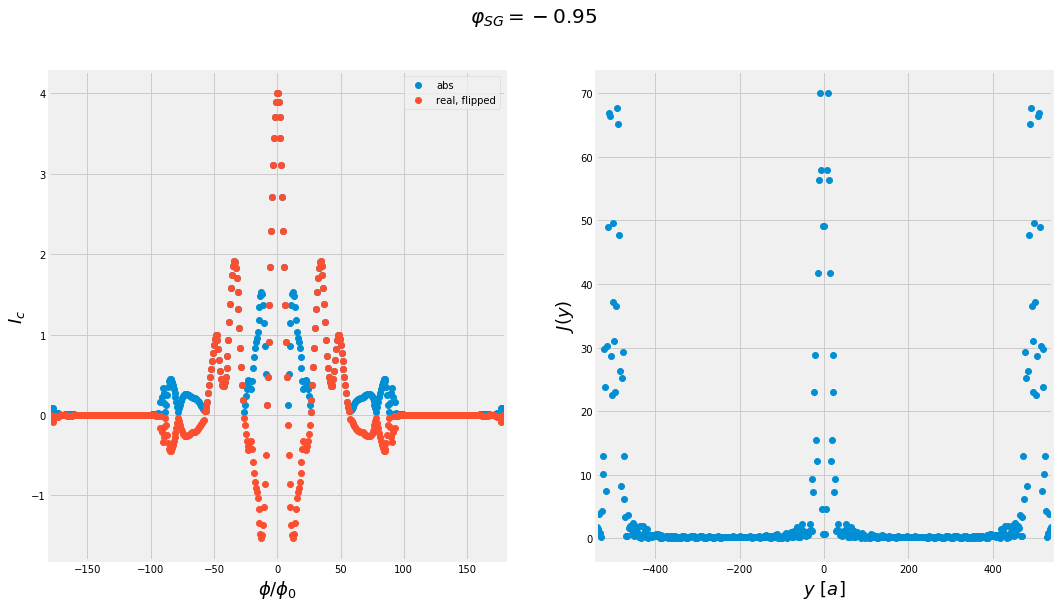

In [47]:
filename = '/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.95-20171107-15:57:06/data.csv'
filedirectory = '/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.95-20171107-15:57:06/'
paramsfile = filedirectory + '/params.txt'
params = {}

with open(paramsfile) as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        params[row[0]] = row[1]
try:
    values = read_values(filename)
except:
    print('Could not open {}'.format(filename))

abspart, realpart, imagpart = np.asarray(values).T
realpart_flipped = flip_minima(abspart, realpart)

nbPoints = float(params['nb_points'])
maxB = float(params['maxB']) 
mag_field = np.linspace(-maxB, maxB, nbPoints)

phi_norm = mag_field * W * L
y = np.linspace(-1.5*W, 1.5*W, 500)
density = transform_to_density(mag_field, realpart_flipped, imagpart, y)

plot_current_and_density(phi_norm, abspart, realpart_flipped, 
                         y, density, phi_sg, filedirectory)

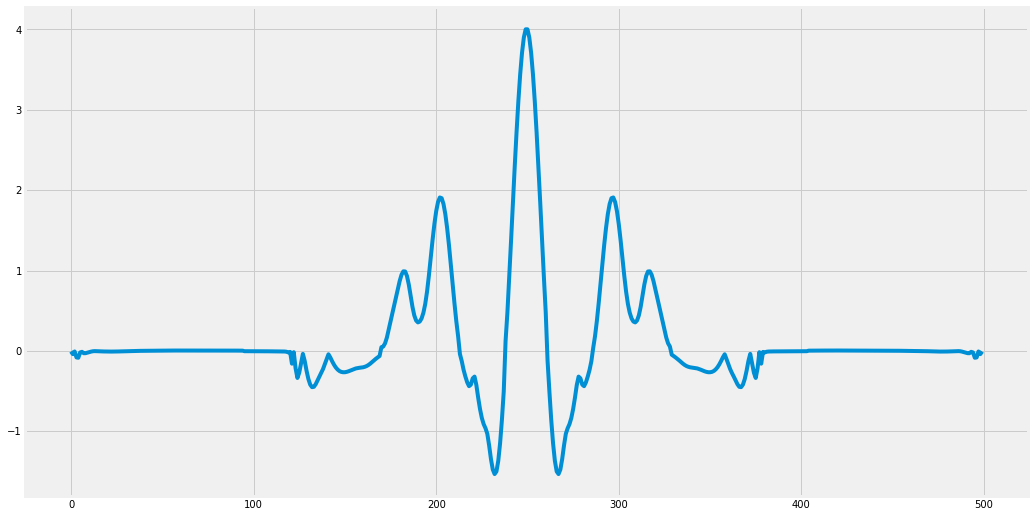

In [44]:
fig, ax = plt.subplots(figsize=(16,9))
ax.plot(real_flip)
#ax.set_yscale('log')

In [5]:
values = np.asarray(read_imag_values(datafile)).T
absval , realval, imagval = values
maxB = 0.0001
magnetic_field = np.linspace(-maxB, maxB, 1000)

In [29]:
W = 360 # in m, scaled system size
L = 100 # in m, scaled system size
phi_norm = magnetic_field * W * L

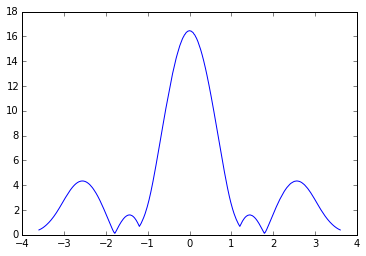

In [8]:
plt.plot(magnetic_field * W * L, absval)

In [9]:
from scipy.signal import argrelmin, argrelmax

def flip_minima(abs_values, real_values):
    main_peak = np.argmax(abs_values) # index of main peak
    left_min = [0]
    right_min = [main_peak]
    for loc_min in argrelmin(abs_values, order=2)[0]:
        if loc_min < main_peak:
            left_min.append(loc_min)
        else: right_min.append(loc_min)
    left_min.append(main_peak)
    right_min.append(len(abs_values))
    left_min_rev = list(reversed(left_min))
    
    print(left_min, right_min, left_min_rev)
    osc = []
    n = len(left_min)
    for i in range(n - 1):
        #print(n-i - 1, n-i-2)
        for index in range(left_min_rev[n  - i - 1], left_min_rev[n - i - 2]):
            #osc.append((-1)**(i+1) * abs(real_values[index]))
            osc.append((-1)**(n - i) * abs(real_values[index]))

    for i in range(n - 1):
        #print(i, i+1)
        for index in range(right_min[i], right_min[i+1]):
            osc.append((-1)**i * abs(real_values[index]))

    return(osc)
    

In [17]:
W = 360
y = np.linspace(-2*W, 2*W, 500)
real_flipped = flip_minima(absval, realval)
density = transform_to_density(magnetic_field, (real_flipped, imagval), y)

[0, 251, 333, 499] [499, 666, 748, 1000] [499, 333, 251, 0]


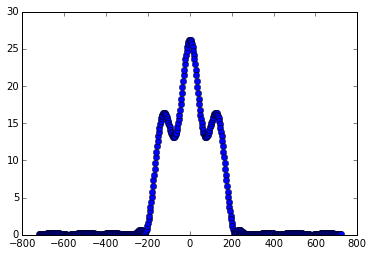

In [18]:
plt.plot(y, density, linestyle='none', marker='o')

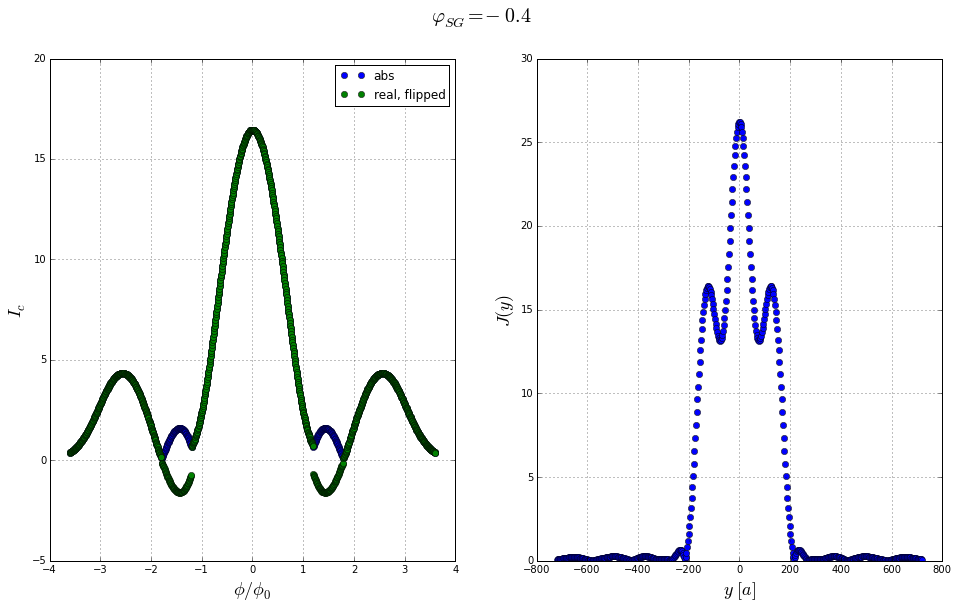

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 9))
fig.suptitle(r'$\varphi_{SG} = -\ 0.4$', fontsize=20)
ax1.plot(phi_norm, absval, marker='o', linestyle='none', label='abs')
ax1.plot(phi_norm, real_flipped, marker='o', linestyle='none', label='real, flipped')
ax1.set_xlabel(r'$\phi / \phi_0 $', fontsize=18)
ax1.set_ylabel(r'$I_c$', fontsize=18)
ax1.legend()
ax1.grid()
ax2.plot(y, density, marker='o', linestyle='none')
ax2.set_xlabel(r'$y\ [a]$', fontsize=18)
ax2.set_ylabel(r'$J(y)$', fontsize=18)
ax2.grid()


In [14]:
file2 = '/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.4-20171026-13:46:14/data.csv'
values2 = np.asarray(read_imag_values(file2)).T

#density2 = transform_to_density(magnetic_field, (values[0], values[1]), y)

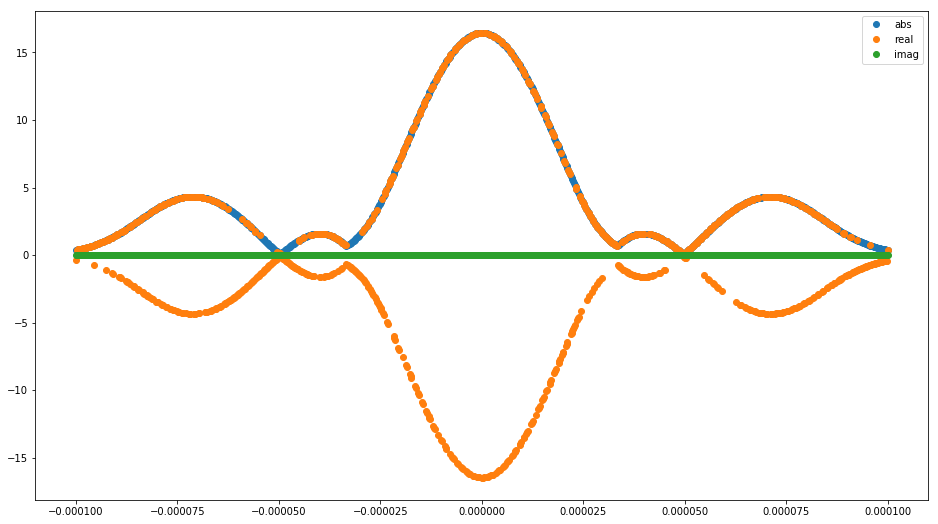

In [15]:
fig, ax = plt.subplots(figsize=(16, 9))
for index, labelname in enumerate(['abs', 'real', 'imag']):
    ax.plot(magnetic_field, values2[index], label=labelname, linestyle='none', marker='o')
ax.legend()

In [84]:
np.argmax(values2[0])

499

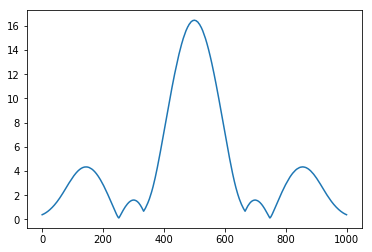

In [105]:
plt.plot(values2[0])

[0, 251, 333, 499] [499, 666, 748, 1000] [499, 333, 251, 0]


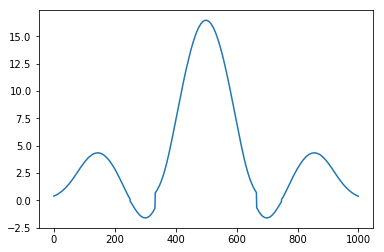

In [118]:
plt.plot(flip_minima(abs_values=values2[0], real_values=values2[1]))

In [110]:
file3 = '/home/nefta/thesis/results/wg3_2/supercurrent/vsg=-0.3-20171026-13:40:36/data.csv'
values3 = np.asarray(read_imag_values(file3)).T

[0, 53, 225, 351, 497] [497, 648, 774, 946, 1000] [497, 351, 225, 53, 0]


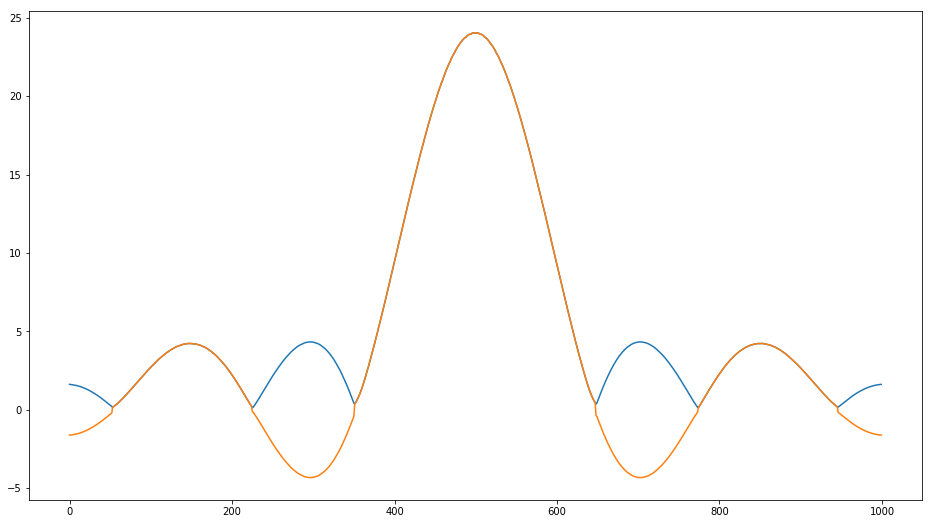

In [119]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(values3[0])
ax.plot(flip_minima(values3[0], values3[1]))

In [115]:
argrelmin(values3[0])

(array([ 53, 150, 225, 351, 648, 774, 849, 946]),)

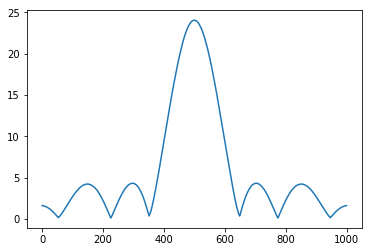

In [116]:
plt.plot(values3[0])